# Data Augmentation

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
% matplotlib inline

Using TensorFlow backend.


In [3]:
from data import load_train_data
imgs_train, imgs_mask_train, subjects = load_train_data()

In [5]:
imgs_train = np.expand_dims(imgs_train, axis=-1)
print("Training images shape: {}".format(imgs_train.shape))
imgs_mask_train = np.expand_dims(imgs_mask_train, axis=-1)
print("Training masks shape: {}".format(imgs_mask_train.shape))

Training images shape: (5635, 420, 580, 1)
Training masks shape: (5635, 420, 580, 1)


In [14]:
""" Generate batches of image data augmentation. The data will be looped over in batches."""

gen = ImageDataGenerator(rotation_range=10, # Degree range for random rotation
                         width_shift_range=0.1, # Fraction of total width for random horizontal shift
                         height_shift_range=0.1, # Fraction of total height for random vertical shift
                         shear_range=0.1, # Shear angle in counter-clockwise direction as radins
                         zoom_range=0.1, # Zoom in or out within 10% range
                         horizontal_flip=True, # Randomly flip inputs horizontally
                         fill_mode='nearest', # Points outside boundaries are filled
                         cval=0.)

In [57]:
# Generate augmented images from both training images and masks
n = 5
aug_imgs, aug_masks = [], []

i = 0
for batch in gen.flow(imgs_train, batch_size=1, shuffle=False, seed=123):
    aug_imgs.append(batch[0])
    i = i+1
    if i>=n:
        break
i = 0
for batch in gen.flow(imgs_mask_train, batch_size=1, shuffle=False, seed=123):
    aug_masks.append(batch[0])
    i = i+1
    if i>=n:
        break

In [59]:
aug_imgs = np.array(aug_imgs)
aug_masks = np.array(aug_masks)

aug_imgs.shape, aug_masks.shape

((5, 420, 580, 1), (5, 420, 580, 1))

Example of Original versus Augmented Images and Masks: 1


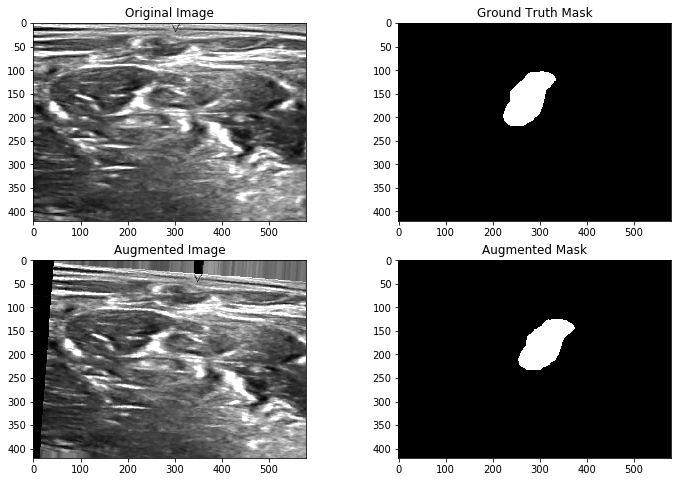

Example of Original versus Augmented Images and Masks: 2


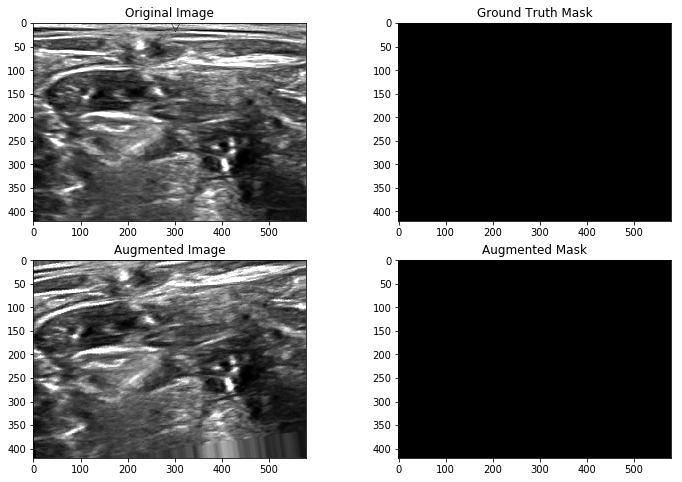

Example of Original versus Augmented Images and Masks: 3


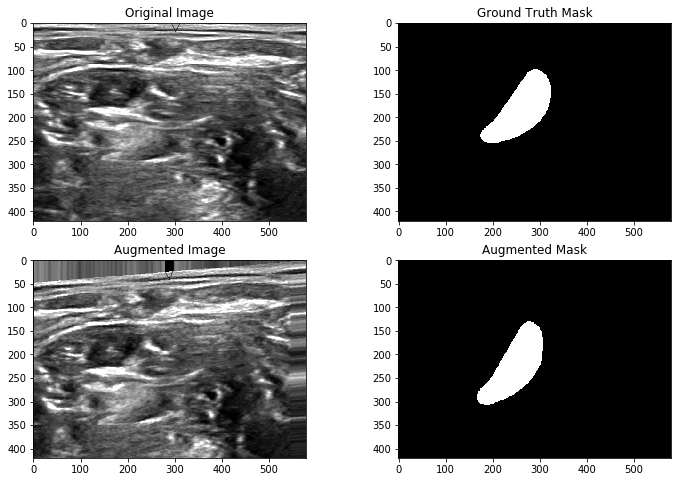

Example of Original versus Augmented Images and Masks: 4


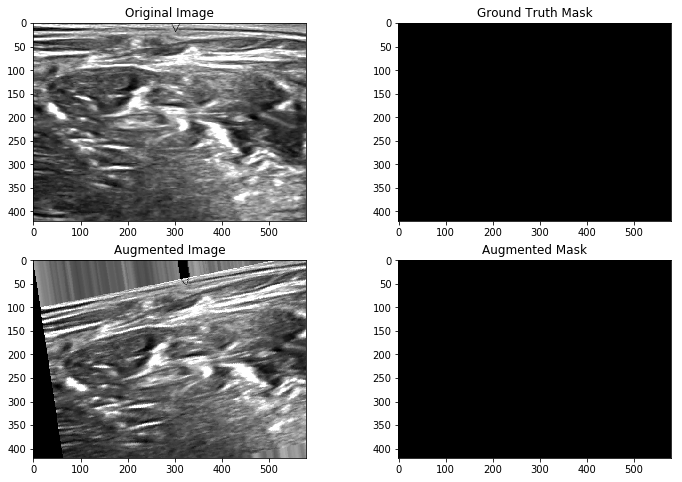

Example of Original versus Augmented Images and Masks: 5


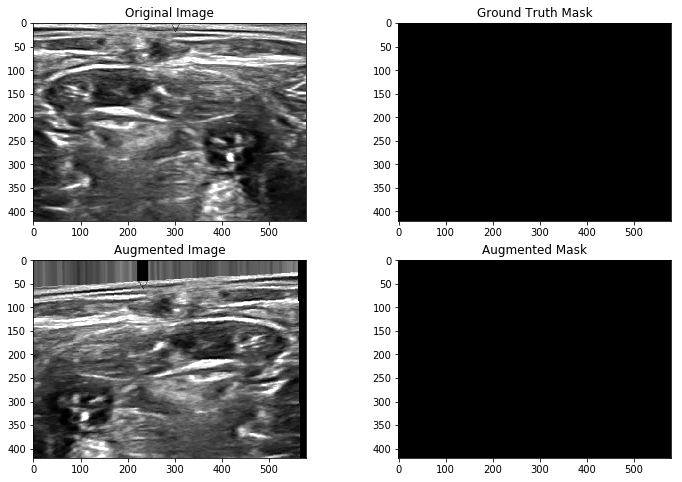

In [51]:
for i in range(n):
    print("Example of Original versus Augmented Images and Masks: {}".format(i+1))
    plt.figure(figsize=(12,8))
    ax = plt.subplot(221)
    ax.set_title("Original Image")
    plt.imshow(np.squeeze(imgs_train[i]), cmap=cm.gray)
    ax = plt.subplot(222)
    ax.set_title("Ground Truth Mask")
    plt.imshow(np.squeeze(imgs_mask_train[i]), cmap=cm.gray)
    ax = plt.subplot(223)
    ax.set_title("Augmented Image")
    plt.imshow(np.squeeze(aug_imgs[i]), cmap=cm.gray)
    ax = plt.subplot(224)
    ax.set_title("Augmented Mask")
    plt.imshow(np.squeeze(aug_masks[i]), cmap=cm.gray)
    plt.show()